In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import glob
import os
import peakutils
import logging
import datetime
import warnings
import sys
from lmfit.models import PseudoVoigtModel, GaussianModel
#from jupyterthemes import jtplot 
from matplotlib.colors import Normalize

In [2]:
sys.path.append('C:\\Users\\USUARIO\\Desktop\\xps_prog\\scripts')

In [3]:
from xps.xps_sw import *
from xps.xps_import import *
from xps.xps_analysis import *
from xps.xps_bg import *
from xps.xps_fits import *

logging.getLogger().setLevel(logging.CRITICAL)
warnings.filterwarnings("ignore")

Atomic Sensibility Factor :

In [4]:
asf = dict({'C1s' : 0.296, 'O1s' : 0.711, 'O1s_sub' : 0.711, 'N1s' : 0.477, 'Ba3d' : 7.49, 'Ba_3d_5/2' : 7.49, 'Ba_3d_3/2' : 5.20,
            'Br_3p' : 1.054, 'Cu_2p' : 5.321, 'Ba_4d': 2.35, 'Na1s' : 1.685, 'Cl_2s' : 0.37, 'Ru3d' : 4.273,
           'In3d' : 4.359, 'Sn3d' : 4.725, 'Cl2p' : 0.891, 'Cl2p_(2)' : 0.891, 'Cl2p_(3)' : 0.891, 'Si2p': 0.339})

asf2 = {'Ba_3d_5/2' : 25.8, 'Ba_3d_3/2': 17.9, 'Ba_4d': 5.86, 'Cl_2p': 2.28, 'Cl_2s': 1.69, }

asf3 = {'Ba_3d_5/2' : 64.3, 'Ba_3d_3/2': 49.9, 'Ba_4d': 5.86, 'Cl_2p': 2.28, 'Cl_2s': 1.50}
mfps = {'Cu2p' : 1.86, 'In3d': 3.05, 'Si2p': 3.8}

In [5]:
regss = ['O1s', 'Si2p', 'N1s', 'C1s', 'In3d', 'Ba3d5/2', 'Cl2p', 'Ru3d5/2', 'Si2s']
asfScof = {}
for r in regss:
    asfScof.update(search_asf(r))

# Import data

In [6]:
path = 'C:\\Users\\USUARIO\\Desktop\\Adelina\\xps_sw-master\\data\\ITO_G2SL\\2022_09_22_ITO_AYN_10\\'
files = glob.glob(path+'/**/*.uxy') 
files.sort()
files = files[::-1]
files

['C:\\Users\\USUARIO\\Desktop\\Adelina\\xps_sw-master\\data\\ITO_G2SL\\2022_09_22_ITO_AYN_10\\proc\\20220922_ITO_clean3_AYN10.uxy',
 'C:\\Users\\USUARIO\\Desktop\\Adelina\\xps_sw-master\\data\\ITO_G2SL\\2022_09_22_ITO_AYN_10\\proc\\20220922_ITO_AYN10_G2SL_subl_18h30min.uxy',
 'C:\\Users\\USUARIO\\Desktop\\Adelina\\xps_sw-master\\data\\ITO_G2SL\\2022_09_22_ITO_AYN_10\\proc\\20220922_ITO_AYN10_G2SL_subl_18h30m_BaCl2_4min.uxy']

In [7]:
g2sl = [read_processed_xp(f) for f in files]

In [8]:
names = ['ITO Clean','ITO G2SL Subl 18h30min',  'ITO G2SL BaCl2 4min']
cols = ['b', 'g', 'r', 'y', 'm', 'c' ,'k', 'green']
for c, n, xp in zip (cols, names, g2sl):
    xp.color = c
    xp.name = n

## Plot regions

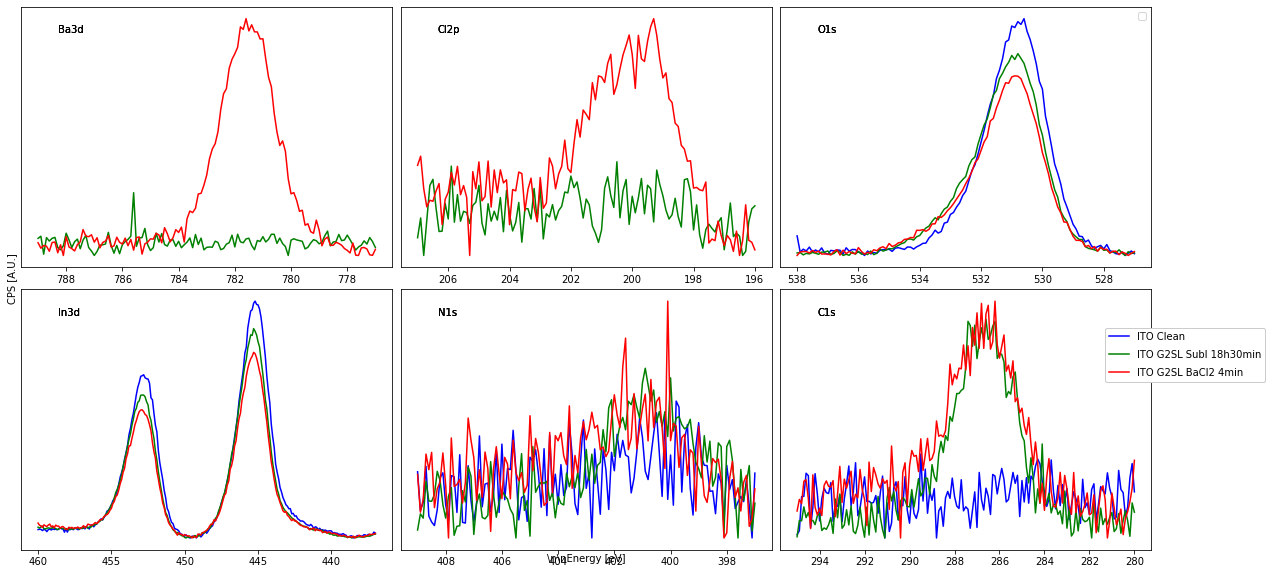

In [9]:
regs = ['Ba3d', 'Cl2p', 'O1s', 'In3d',  'N1s', 'C1s',] 
ax = plot_xp_regions(g2sl, regs, ncols=3);
ax[0,0].invert_xaxis()
ax[0,1].invert_xaxis()

# Oxygen substraction

In [11]:
path = 'C:\\Users\\USUARIO\\Desktop\\Adelina\\xps_sw-master\\data\\ITO_G2SL\\2022_09_22_ITO_AYN_10\\'
files = glob.glob(path+'/**/*.sxy') 
files.sort()

files = files[::-1]

scaled = [read_processed_xp(f) for f in files]

[Errno 2] No such file or directory: 'C:\\Users\\USUARIO\\Desktop\\Adelina\\xps_sw-master\\data\\ITO_G2SL\\2022_09_22_ITO_AYN_10\\proc\\20220922_ITO_clean3_AYN10.sxy.ft', returning empty fit dict
[Errno 2] No such file or directory: 'C:\\Users\\USUARIO\\Desktop\\Adelina\\xps_sw-master\\data\\ITO_G2SL\\2022_09_22_ITO_AYN_10\\proc\\20220922_ITO_AYN10_G2SL_subl_18h30min.sxy.ft', returning empty fit dict
[Errno 2] No such file or directory: 'C:\\Users\\USUARIO\\Desktop\\Adelina\\xps_sw-master\\data\\ITO_G2SL\\2022_09_22_ITO_AYN_10\\proc\\20220922_ITO_AYN10_G2SL_subl_18h30m_BaCl2_4min.sxy.ft', returning empty fit dict


In [12]:
names = ['ITO Clean','ITO G2SL',  'ITO G2SL $BaCl_2$']
cols = ['b', 'g', 'r']
for c, n, xp in zip (cols, names, scaled):
    xp.color = c
    xp.name = n

## Aling experiments

In [21]:
#ALing
for xp in g2sl:
    shift = find_shift(xp, g2sl[0], region='In3d')
    align_dfx(xp, shift, inplace=True);

In [ ]:
#Normalice
scaled = []
for xp in g2sl:
    scaled.append(normalise_dfx(xp))

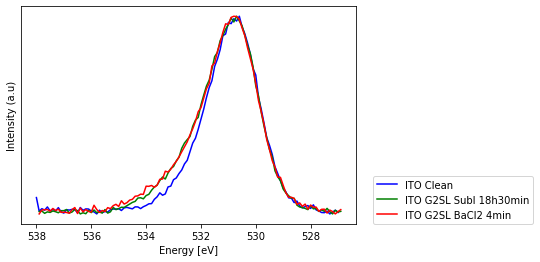

In [22]:
for xp in scaled: 
    plot_region(xp, 'O1s')
plt.gca().set(ylabel = 'Intensity (a.u)', yticks = [])
plt.legend(bbox_to_anchor=(1.05, 0), loc=3, borderaxespad=0)

## Substract Clean Oxygen 

In [23]:
sub=[scaled[0]]

for xp in scaled[0:]:
    trim_spectra(xp, scaled[1], region='O1s', inplace=True) 

for xp in scaled[1:]:
    subscaled = subtract_ref_region(xp, scaled[0], region='O1s') #Subtraction 
    sub.append(subscaled)

for xp in sub[1:]:
    crop_spectrum(xp, region='O1s_sub', eup=538, edw=527, inplace=True) #Correct x-axis

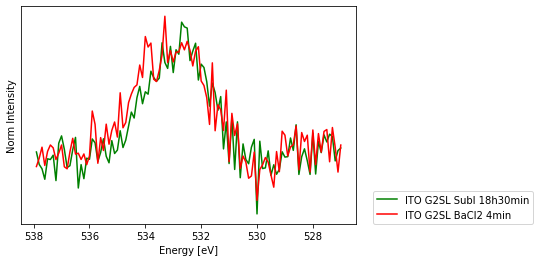

In [24]:
for xp in sub[1:]:
    plot_region(xp, 'O1s_sub')
plt.gca().set(ylabel = 'Norm Intensity', yticks = [])
plt.gca().invert_xaxis()
plt.legend(bbox_to_anchor=(1.05, 0), loc=3, borderaxespad=0)

# Stoichiometry

In [57]:
asfScof['Ba3d'] = 5.8329

'O1s_sub' region does not exist in ITO Clean
'Ba3d' region does not exist in ITO Clean
'Cl2p' region does not exist in ITO Clean


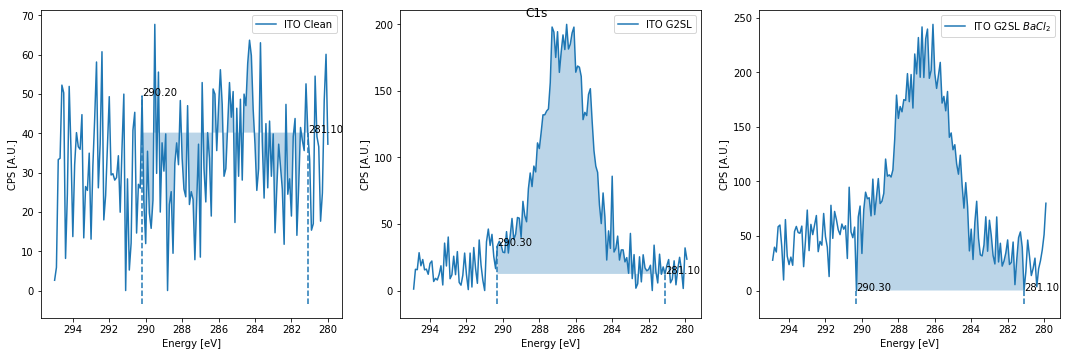

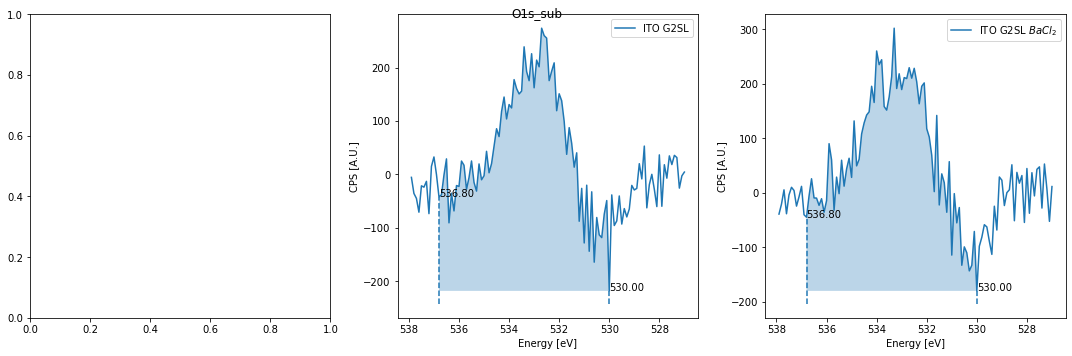

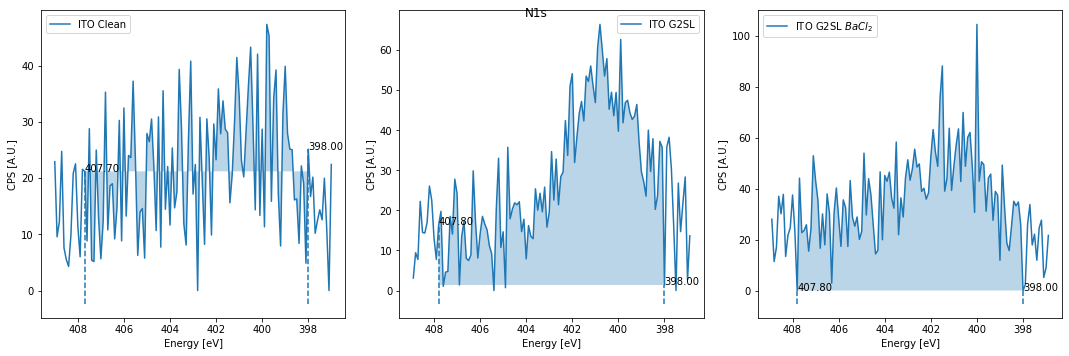

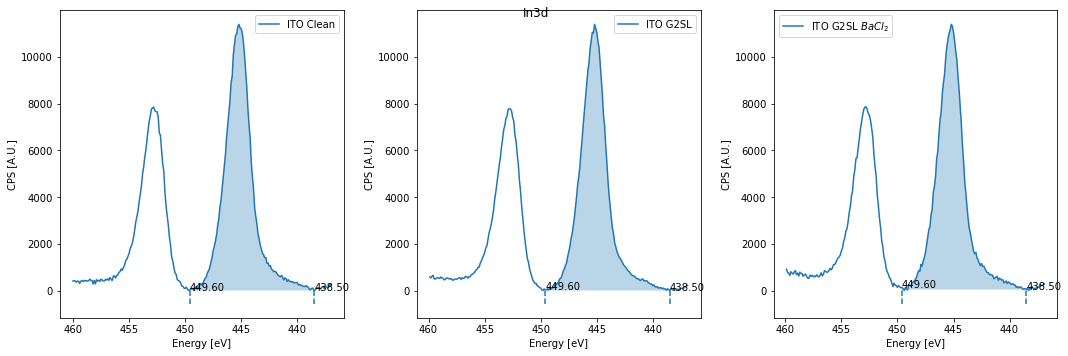

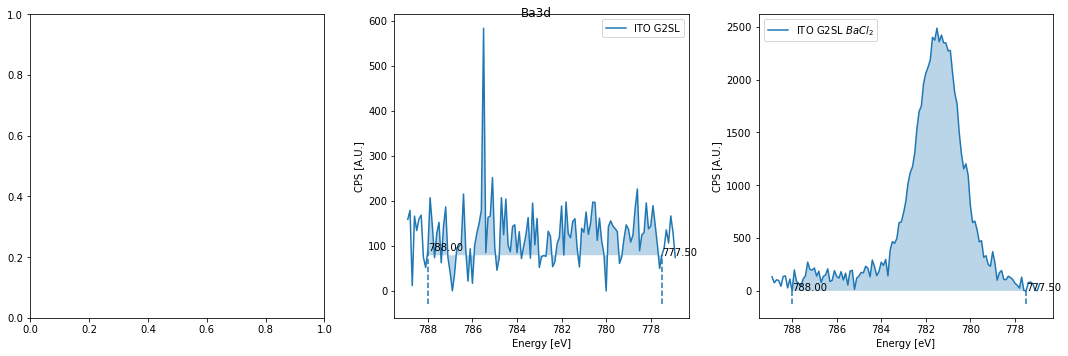

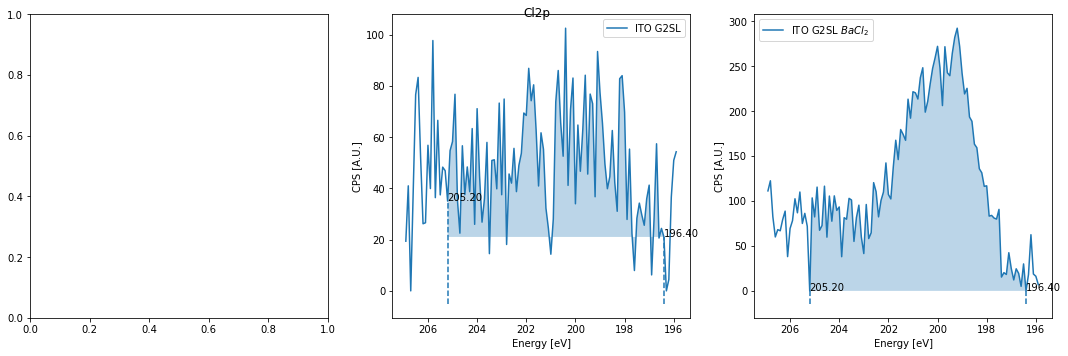

In [58]:
regs = ['C1s', 'O1s_sub', 'N1s', 'In3d', 'Ba3d', 'Cl2p']

for r in regs:
    integrateRegions(sub, r, asf)

In [63]:
a = {'C1s': 12+6+6+5+2+1+3, 'N1s': 4, 'Si2p': 1, 'O1s': 9,'O1s_sub':9, 'Ba3d': 1e-10, 'Cl2p': 1e-10, 'G2': 1, 'Na1s': 1e-10, 'Ru3p': 1e-10}
stog2 = XPS_experiment(name='Sto. G2-SL', area=a) 

for xp in sub:
    xp.area['G2'] = xp.area['N1s'] / 4

In [64]:
num = ['Ba3d', 'Cl2p','C1s', 'O1s_sub', 'C1s']
denom = ['G2','Ba3d','O1s_sub', 'N1s','N1s']
display_stoichiometry(sub+[stog2], num, denom)

# Coverage

In [28]:
path = 'C://Users//USUARIO//Desktop//xps_prog//data//ITO_G2SL_copy/2022_09_22_ITO_AYN_10/'
files = glob.glob(path+'/**/*.uxy')
files.sort()
files = files[::-1]

unscaled = [read_processed_xp(f) for f in files]

[Errno 2] No such file or directory: 'C://Users//USUARIO//Desktop//xps_prog//data//ITO_G2SL_copy/2022_09_22_ITO_AYN_10\\proc\\20220922_ITO_clean3_AYN10.uxy.ft', returning empty fit dict
[Errno 2] No such file or directory: 'C://Users//USUARIO//Desktop//xps_prog//data//ITO_G2SL_copy/2022_09_22_ITO_AYN_10\\proc\\20220922_ITO_AYN10_G2SL_subl_18h30min.uxy.ft', returning empty fit dict
[Errno 2] No such file or directory: 'C://Users//USUARIO//Desktop//xps_prog//data//ITO_G2SL_copy/2022_09_22_ITO_AYN_10\\proc\\20220922_ITO_AYN10_G2SL_subl_18h30m_BaCl2_4min.uxy.ft', returning empty fit dict


In [31]:
names = ['ITO Clean','ITO G2SL',  'ITO G2SL $BaCl_2$']
for n, xp in zip (names, unscaled):
    xp.name = n

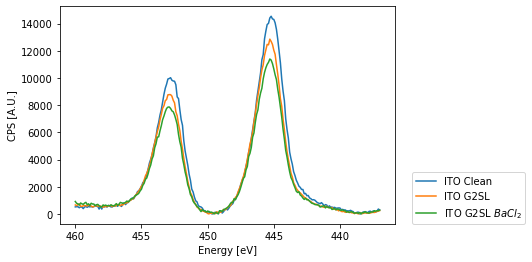

In [30]:
region = 'In3d'
for xp in unscaled:
    plot_region(xp, region)
    plt.legend(bbox_to_anchor=(1.05, 0), loc=3, borderaxespad=0)

In [32]:
inds = [[1, 2,0]] 
arrange_coverages(unscaled, inds, r_ml=1.1,
                  region='In3d', mfp=3.05, takeoff=10)

matrix([[0.40932074, 0.00228458],
        [0.64978816, 0.00371188]])